In [286]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn as skl
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [287]:
# Load the dataset
data = pd.read_csv('cleaned_data.csv')
# data = pd.read_csv('Resources\Heart_Disease.csv')

# Inspect the first few rows of the dataset
print(data.head())

# Check for any missing values
print(data.isnull().sum())

# Inspect data types and general info
print(data.info())


   Unnamed: 0  sex  age  education  smokingStatus  cigsPerDay  BPMeds  \
0           0  1.0   39          4            0.0           0       0   
1           1  0.0   46          2            0.0           0       0   
2           2  1.0   48          1            1.0          20       0   
3           3  0.0   61          3            1.0          30       0   
4           4  0.0   46          3            1.0          23       0   

   prevalentStroke  prevalentHyp  diabetes  totChol    BMI  heartRate  \
0                0             0         0      195  26.97         80   
1                0             0         0      250  28.73         95   
2                0             0         0      245  25.34         75   
3                0             1         0      225  28.58         65   
4                0             0         0      285  23.10         85   

   glucose  CHDRisk         MAP  
0       77        0   82.000000  
1       76        0   94.333333  
2       70        0 

In [288]:
# data = data.drop(columns = ['MAP'])
# data

In [289]:
# # Last column is the label
X = data.iloc[:, :-1].values
y = data.iloc[:, -2].values

# Use sklearn to split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

# Create scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [290]:
X_train_scaled.shape, len(X_train_scaled[0]), y_train.shape

((2909, 15), 15, (2909,))

In [291]:
# Define the model
input_features_total = len(X_train_scaled[0])
nodes_layer1 = 32
nodes_layer2 = 32
nodes_layer3 = 5

model = tf.keras.models.Sequential()

# First layer
model.add(tf.keras.layers.Dense(units=nodes_layer1, input_dim = input_features_total, activation = "relu"))

# Second layer
model.add(tf.keras.layers.Dense(units=nodes_layer2, activation = "relu"))

# Third layer
model.add(tf.keras.layers.Dense(units=nodes_layer3, activation = "relu"))

# Output layer
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
model.summary()



# # Create the Keras Sequential model
# model = Sequential()

# # Add layers
# model.add(Dense(units=94, activation='relu', input_shape=(X_train.shape[1],)))
# # model.add(Dense(units=32, activation='relu'))
# model.add(Dense(units=1, activation='sigmoid'))

# # Print model summary
# model.summary()


c:\Users\tylio\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_115 (Dense)               │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 5)              │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,739 (6.79 KB)

 Trainable params: 1,739 (6.79 KB)

 Non-trainable params: 0 (0.00 B)

In [292]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = model.fit(X_train_scaled,y_train,epochs=5)


# # Compile the Sequential model together and customize metrics
# model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# # Fit the model to the training data
# heart_model = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)


Epoch 1/5


91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7670 - loss: 0.5163
Epoch 2/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9751 - loss: 0.1019
Epoch 3/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.9988 - loss: 0.0246
Epoch 4/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 1.0000 - loss: 0.0073
Epoch 5/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0038


In [293]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

23/23 - 0s - 5ms/step - accuracy: 0.9986 - loss: 0.0034
Loss: 0.0034166874829679728, Accuracy: 0.9986263513565063


In [294]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

print(f"Test Accuracy: {test_accuracy}")


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9998 - loss: 0.0025 
Test Accuracy: 0.9986263513565063


In [295]:
# Make predictions
predictions = model.predict(X_test_scaled)

# Convert predictions to binary (0 or 1) if it's a classification problem
predictions = (predictions > 0.5).astype(int)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<Axes: >

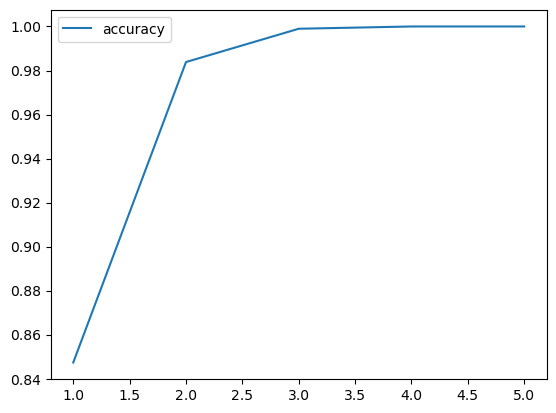

In [296]:
#plot the accuracy
accuracy_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
accuracy_df.plot(y = 'accuracy')